# LARGER DATASETS

In [1]:
#IMPORTING LIBRARIES    
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read insurance data set
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# lets try one hot encoding in our data frame due to the categorical data in our data frame (it has strings,integers,floats)
insurance_one_hot=pd.get_dummies(insurance).astype(int)
insurance_one_hot.head() #The insurance_one_hot.head() command in pandas is used to display the first few rows of the insurance_one_hot DataFrame. By default, head() shows the first 5 rows, but you can specify a different number of rows by passing an argument to the method (e.g., head(10) would show the first 10 rows).

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [4]:
#create X and y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
X.head(),y.head()

(   age  bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19   27         0           1         0          0           1   
 1   18   33         1           0         1          1           0   
 2   28   33         3           0         1          1           0   
 3   33   22         0           0         1          1           0   
 4   32   28         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884
 1     1725
 2     4449
 3    21984
 4     3866
 Name: charges, dtype: int32)

In [5]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [6]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - loss: 13217.9834 - mae: 13217.9834 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 12936.0811 - mae: 12936.0811
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 12399.9277 - mae: 12399.9277
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 11497.0801 - mae: 11497.0801
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 10276.1260 - mae: 10276.1260
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 9000.2197 - mae: 9000.2197
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 7989.6294 - mae: 7989.6294
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 7520.1641 - mae: 7520.1641
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 7416.6680 - mae: 7416.6680
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 7381.5220 - mae: 7381.5220
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 7357.5703 - mae: 7357.5703
Epoch 12/100
34/34 

In [7]:
insurance_model.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5342.9404 - mae: 5342.9404  


[5178.52197265625, 5178.52197265625]

In [8]:
y_train.mean()

13345.596261682243

Increasing the number of layers (2 -> 3).
Increasing the number of units in each layer (except for the output layer).
Changing the optimizer (from SGD to Adam).

In [9]:
#Right now our model is running substantially wrong so we are goonna try to improve our model
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history=insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 12780.4844 - mae: 12780.4844
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 7600.6982 - mae: 7600.6982
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 7240.0186 - mae: 7240.0186
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 7023.2119 - mae: 7023.2119
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 6746.2354 - mae: 6746.2354
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 6415.5962 - mae: 6415.5962
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 6268.2847 - mae: 6268.2847
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 6135.8145 - mae: 6135.8145
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 5992.9453 - mae: 5992.9453
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 5830.6069 - mae: 5830.6069
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 5584.1138 - mae: 5584.1138
Epoch 12/100
34/34 ━━━━━━━━━

In [10]:
insurance_model_2.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 3249.1082 - mae: 3249.1082


[3183.697509765625, 3183.697509765625]

Much better! Using a larger model and the Adam optimizer results in almost half the error as the previous model.

🔑 Note: For many problems, the Adam optimizer is a great starting choice. See Andrei Karpathy's "Adam is safe" point from A Recipe for Training Neural Networks for more.

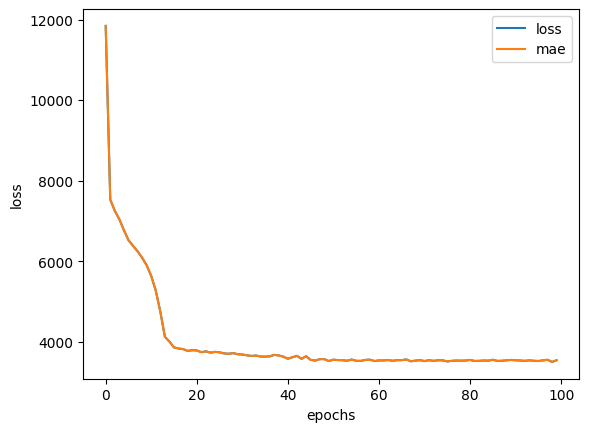

In [11]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [12]:
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history_3=insurance_model_3.fit(X_train,y_train,epochs=100,verbose=0)

In [13]:
insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3237.9507 - mae: 3237.9507  


[3173.884521484375, 3173.884521484375]

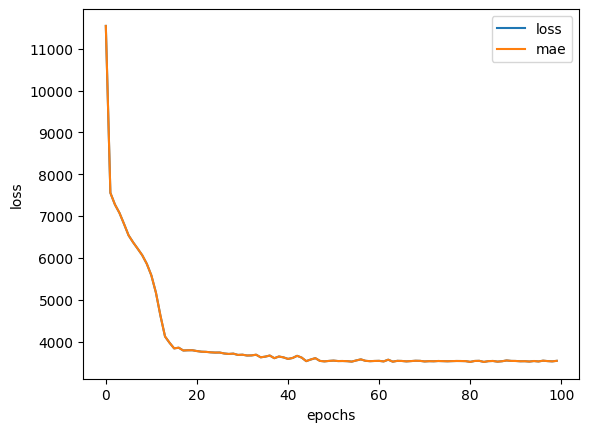

In [14]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [15]:
y_train.mean()

13345.596261682243

In [16]:
#how long should you train?
# it depends . really... it depends on the problem . IN tensor flow there is a concept called as EarlyStopping.Callback which is a tensorflow component you can add to your model to stop from imporving a certain metrics

In [17]:
#lets use early stopping callbacks
#build a neural network
tf.random.set_seed(42)

#create model
insurance_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"])

#fit the model
history_4=insurance_model_4.fit(X_train,y_train,epochs=100,verbose=0)

c:\Users\ayush\OneDrive\Documents\Personal projects\MachineLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
insurance_model_4.evaluate(X_test,y_test),insurance_model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3223.8203 - mae: 3223.8203 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 3237.9507 - mae: 3237.9507


([3163.726318359375, 3163.726318359375],
 [3173.884521484375, 3173.884521484375])

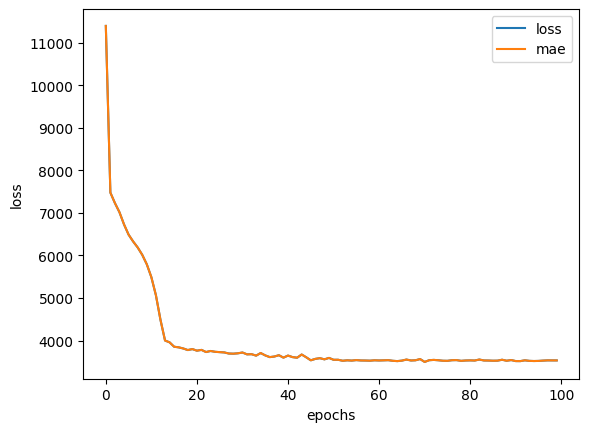

In [19]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

#Preprocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

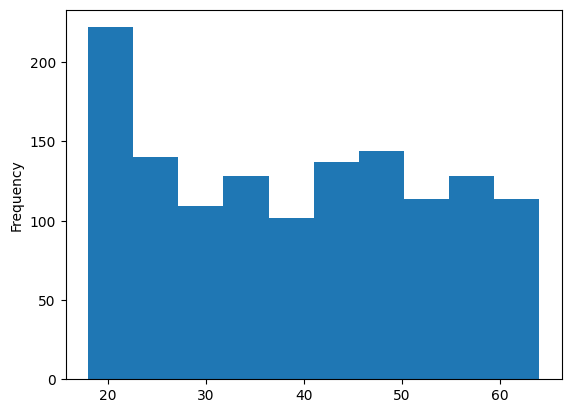

In [20]:
X["age"].plot(kind="hist")#in pandas is used to create a histogram of the "age" column in the DataFrame X.

<Axes: ylabel='Frequency'>

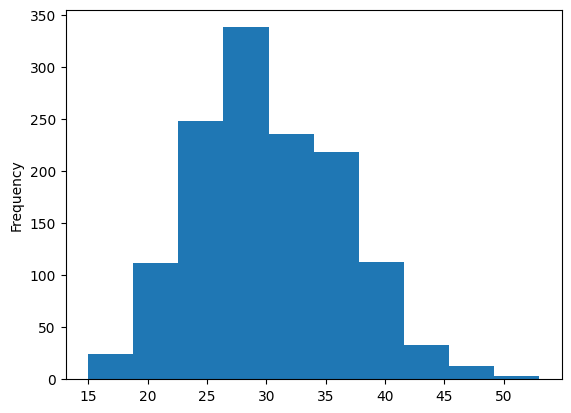

In [21]:
X["bmi"].plot(kind="hist")

In [22]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
#to prepare our data we can borrow few classes from scikit leran
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

#create a coloumn transformer
ct=make_column_transformer((MinMaxScaler(),["age","bmi","children"]),#turn all the values in these columns between 0 and 1    
(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"]))

#create x and y value
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with  normalization (MinMaxScaler ) and OneHotEncoder
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [25]:
#what our data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [27]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded lets build a neural network model  on it and see how it goes

In [87]:
from sklearn.metrics import r2_score

# Ensure reproducibility
tf.random.set_seed(42)

# Build the neural network model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(800, activation='relu', input_shape=(X_train_normal.shape[1],)),  # Added activation function
    tf.keras.layers.Dropout(0.1),  # Dropout layer for regularization
    tf.keras.layers.Dense(800, activation='relu'),  # Additional layer for complexity
    tf.keras.layers.Dropout(0.1),  # Dropout layer for regularization
    tf.keras.layers.Dense(800, activation='relu'),  # Added activation function
    tf.keras.layers.Dropout(0.1),  # Dropout layer for regularization
    tf.keras.layers.Dense(600, activation='relu'),  # Additional layer for complexity
    tf.keras.layers.Dropout(0.1),  # Dropout layer for regularization
    tf.keras.layers.Dense(300, activation='relu'),  # Additional layer for complexity
        tf.keras.layers.Dense(100, activation='relu'),  # Additional layer for complexity
    tf.keras.layers.Dense(50, activation='relu'),  # Added activation function
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),  # Adjusted learning rate
    metrics=["mae"]
)

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   
    patience=20,          
    restore_best_weights=True  
)

# Fit the model with early stopping
history_5 = insurance_model_5.fit(
    X_train_normal, y_train,
    epochs=100,
    validation_data=(X_test_normal, y_test),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
loss, mae = insurance_model_5.evaluate(X_test_normal, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Get predictions for the test set
y_pred = insurance_model_5.predict(X_test_normal)

# Compute R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


Epoch 1/100


c:\Users\ayush\OneDrive\Documents\Personal projects\MachineLearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.0000e+00 - loss: 10990.0049 - val_accuracy: 0.0000e+00 - val_loss: 6082.2510
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0000e+00 - loss: 5220.9287 - val_accuracy: 0.0000e+00 - val_loss: 4498.5420
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0000e+00 - loss: 4203.8994 - val_accuracy: 0.0000e+00 - val_loss: 3269.3052
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.0000e+00 - loss: 3419.6868 - val_accuracy: 0.0000e+00 - val_loss: 4105.5542
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0000e+00 - loss: 3802.7629 - val_accuracy: 0.0000e+00 - val_loss: 2883.2642
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0000e+00 - loss: 3139.0325 - val_accuracy: 0.0000e+00 - val_loss: 2749.1616
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.0000e+00 - loss: 3116.6709 - val_accuracy: 0.0000e+00 - val_loss: 3022.3604
Epoch 8/100
34/34

In [88]:
insurance_model_5.evaluate(X_test_normal,y_test) 
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1498.3539 - mae: 1498.3539

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1427.0686 


[1524.9306640625, 0.0]

In [85]:
insurance_model_5.save("insurance_model_5.h5")

In [86]:
new_model = tf.keras.models.load_model('insurance_model_5.h5')
new_model.evaluate(X_test_normal, y_test)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1439.9807 - mean_absolute_error: 1439.9807  


[1535.798828125, 1535.798828125]